<a href="https://colab.research.google.com/github/beckman9191/APS1070-Foundations-of-Data-Analytics-and-Machine-Learning/blob/main/APS1070_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# APS1070
#### Project 1 --- Basic Principles and Models
**Deadline: Oct 6th, 11PM - 10 percent**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Name: Zhengnan Zhu  

Student ID: 1005209971

##**Marking Scheme:**

This project is worth **10 percent** of your final grade.

Draw a plot or table where necessary to summarize your findings.

**Practice Vectorized coding**: If you need to write a loop in your solution, think about how you can implement the same functionality with vectorized operations. Try to avoid loops as much as possible (in some cases, loops are inevitable).




### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus for grading.



Ref: https://stackoverflow.com/a/64487858



# Project 1 [10 Marks]
Let's apply the tools we have learned in the tutorial to a new dataset.

We're going to work with a [boston dataset](https://openml.org/search?type=data&status=any&id=43465). Download it using the cell below:

In [ ]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
dataset = fetch_openml(name='Boston-house-price-data', version=1, parser="auto")

## Part 1: Getting started [2.5 Marks]
First off, take a look at the `data`, `target` and `feature_names` entries in the `dataset` dictionary. They contain the information we'll be working with here. Then, create a Pandas DataFrame called `df` containing the data and the targets, with the feature names as column headings. If you need help, see [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) for more details on how to achieve this. **[0.4]**
* How many features do we have in this dataset?

     **13**
* Determine the median target value.

     **21.2**
* How many participants have a target value greater than the median target value?

     **250**

Now add an additional column containing either 0 (if the target value is below the median) or 1 (if the target value is above the median). This will be the new target value to classify the data as the owner-occupied homes value in \$1000's below median or the owner-occupied homes value in \$1000's above median. **[0.5]**

In [ ]:
import pandas as pds
#create the Pandas DataFrame
df = pds.DataFrame(data=dataset.data, columns=dataset.feature_names)
#get the median target value
df['target']=dataset.target
df['target'].median()

#get # of participants have a target value greater than the median target value
participants=df.loc[df['target']>df['target'].median()]
#print(participants)
#num_participants=len(participants)
#print(num_participants)
#print(df)

#add additional column
df['if_above_median']=np.where(df['target']>df['target'].median(),1,0)
print(dataset.data)




        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

### Splitting the data
It is best practice to have a training set (from which there is a rotating validation subset) and a test set. Our aim here is to (eventually) obtain the best accuracy we can on the test set (we'll do all our tuning on the training/validation sets, however.)

**Split the dataset** into a train and a test set **"70:30"**, use **``random_state=0``**. The test set is set aside (untouched) for final evaluation, once hyperparameter optimization is complete. **[0.5]**

**Only Split the dataset once within you notebook.** You should not use the `train_test_split` function more than once, regardless of the random state. Keep this in mind for your future projects as well.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.data, df['if_above_median'], test_size=0.3, random_state=0)

print(y_train)

141    0
272    1
135    0
298    1
122    0
      ..
323    0
192    1
117    0
47     0
172    1
Name: if_above_median, Length: 354, dtype: int64


### Effect of Standardization (Visual)
Use `seaborn.lmplot` ([help here](https://seaborn.pydata.org/generated/seaborn.lmplot.html)) to visualize a few features of the training set. Draw a plot where the x-axis is the *proportion of owner-occupied units built prior to 1940* i.e. ``AGE``, the y-axis is the *weighted distances to five Boston employment centres* i.e. ``DIS``, and the color of each datapoint indicates its class.  **[0.5]**

Standardizing the data is often critical in machine learning. Show a plot as above, but standardize the two features. What's different? **why do they look similar?** Based on your observation, what is the advantage of standardization? **[0.6]**


        CRIM    ZN  INDUS  CHAS    NOX     RM       AGE       DIS  RAD    TAX  \
141  1.62864   0.0  21.89   0.0  0.624  5.019  1.105837 -2.409360  4.0  437.0   
272  0.11460  20.0   6.96   0.0  0.464  6.538 -0.367141 -2.320978  3.0  223.0   
135  0.55778   0.0  21.89   0.0  0.624  6.335  1.041639 -2.385418  4.0  437.0   
298  0.06466  70.0   2.24   0.0  0.400  6.345 -1.743823 -2.181516  5.0  358.0   
122  0.09299   0.0  25.65   0.0  0.581  5.961  0.852613 -2.386267  2.0  188.0   
..       ...   ...    ...   ...    ...    ...       ...       ...  ...    ...   
323  0.28392   0.0   7.38   0.0  0.493  5.708  0.189238 -2.292317  5.0  287.0   
192  0.08664  45.0   3.44   0.0  0.437  7.178 -1.522698 -2.229592  5.0  398.0   
117  0.15098   0.0  10.01   0.0  0.547  6.021  0.485260 -2.362710  6.0  432.0   
47   0.22927   0.0   6.91   0.0  0.448  6.030  0.588690 -2.257782  3.0  233.0   
172  0.13914   0.0   4.05   0.0  0.510  5.572  0.695686 -2.368106  5.0  296.0   

     PTRATIO       B  LSTAT

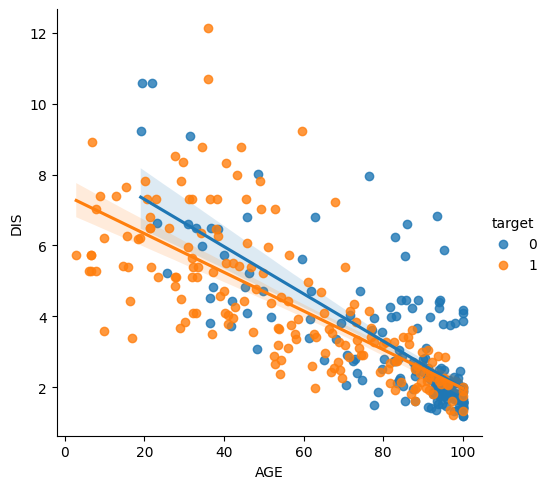

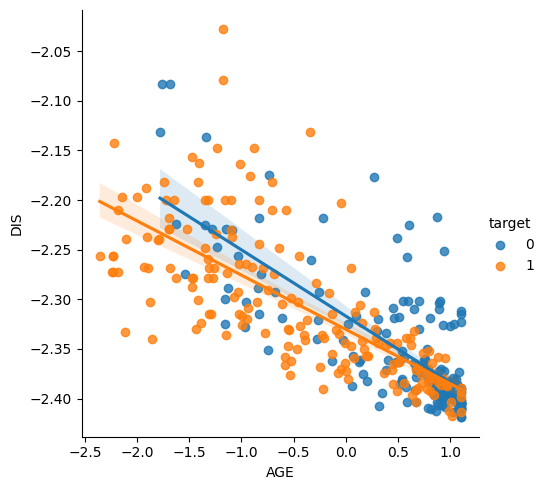

In [ ]:
import seaborn as sns
df_train=pds.DataFrame(data=X_train, columns=dataset.feature_names)
df_train['target']=y_train
#print(df_train)

#plot the graph
graph=sns.lmplot(x="AGE", y="DIS", hue="target", data=df_train)

#standardization
df_train_age_mean=df_train['AGE'].mean()
df_train_age_std=df_train['AGE'].std()
df_train['AGE']=(df_train['AGE']-df_train_age_mean)/df_train_age_std
#df_train.AGE.map(lambda p:(p-df_train_age_mean)/df_train_age_std)

df_train_dis_mean=df_train['DIS'].mean()
df_train_dis_std=df_train['DIS'].std()
df_train['DIS']=(df_train['DIS']-df_train_age_mean)/df_train_age_std
#df_train.DIS.map(lambda p:(p-df_train_dis_mean)/df_train_dis_std)
#print(df_train)
print(df_train)
graph=sns.lmplot(x="AGE", y="DIS", hue="target", data=df_train)


The scale for the x-axis and y-axis is different. They look similar since data for the x-axis and y-axis used the same process to transform. Thus, the relation between them is the same. I think that the advantage of standardization is to provide a better understanding of the data based on the adjustment with mean and standard deviation.

## Part 2: KNN Classifier without Standardization [2 Marks]
Normally, standardizing data is a key step in preparing data for a KNN classifier. However, for educational purposes, let's first try to build a model without standardization. Let's create a KNN classifier to predict whether a house has the owner-occupied homes value that is less than the median or greater than the median.

Follow these steps:

1.   Train a KNN Classifier using cross-validation on the dataset. Sweep `k` (number of neighbours) from 1 to 100, and show a plot of the mean cross-validation accuracy vs `k`. **[1]**
2.   What is the best `k`? What is the highest cross-validation accuracy? **[0.5]**
     
     **The best k is 3 and the highest cross_validation accuracy is 0.8051509054325955**
3. Comment on  which ranges of `k` lead to underfitted or overfitted models (hint: compare training and validation curves!). **[0.5]**

     **1 <= K <= 30, the model is overfitted**\
     **30 <= K <= 100, the model is underfitted**




the best k is 3
the highest cross-validation accuracy is 0.8051509054325955


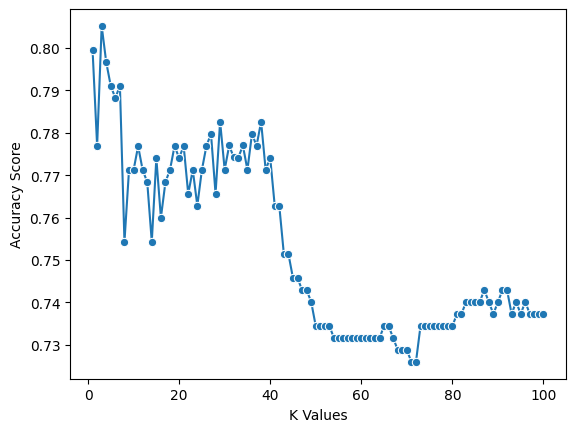

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_validate

test_scores=[]
train_scores=[]
k_values = [i for i in range (1,101)]
for i in k_values:
  KNN=KNeighborsClassifier(n_neighbors=i)
  scores=cross_validate(KNN, X_train, y_train, cv=5, return_train_score=True)
  test_scores.append(scores['test_score'].mean())
  train_scores.append(scores['train_score'].mean())



sns.lineplot(x = k_values, y = test_scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

best_index = np.argmax(test_scores)
best_k = k_values[best_index]
full_feature_accuracy=test_scores[best_index]
print("the best k is " + str(best_k))
print("the highest cross-validation accuracy is " + str(full_feature_accuracy))






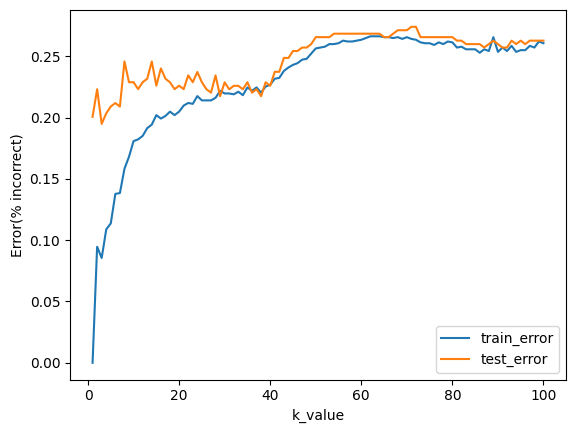

In [ ]:
plt.ylabel("Error(% incorrect)")
plt.xlabel("k_value")
plt.plot(k_values, [1-x for x in train_scores], label='train_error')
plt.plot(k_values, [1-x for x in test_scores], label='test_error')
plt.legend()

## Part 3: Feature Selection [3 Marks]
In this part, we aim to investigate the importance of each feature on the final classification accuracy.
If we want to try every possible combination of features, we would have to test  $2^F$ different cases,  where F is the number of features, and in each case, we have to do a hyperparameter search (finding K, in KNN using cross-validation). That will take days!.

To find more important features we will use a decision tree. based on a decision tree we can compute feature importance that is a metric for our feature selection (code is provided below).

You can use [this link](https://machinelearningmastery.com/calculate-feature-importance-with-python/
) to get familiar with extracting the feature impotance order of machine learning algorithms in Python.

After we identified and removed the least important feature and evaluated a new KNN model on the new set of features, if the stop conditions (see step 7 below) are not met, we need to repeat the process and remove another feature.


Design a function ( `Feature_selector`) that accepts your dataset (X_train , y_train) and a threshold as inputs and: **[1]**
1. Fits a decision tree classifier on the training set.

2. Extracts the feature importance order of the decision tree model.

3. Removes the least important feature based on step 2.
4. Then, a KNN model is trained on the remaining features. The number of neighbors (`k`) for each KNN model should be tuned using a 5-fold cross-validation.
5. Store the best `mean cross-validation` score and the corresponding `k` (number of neighbours) value in two lists.
6. Go back to step 3 and follow all the steps until you meet the stop condition (step 7).

7. We will stop this process when (1) there is only one feature left, or (2) our cross-validation accuracy is dropped significantly compared to a model that uses all the features. In this function, we accept a threshold as an input argument. For example, if threshold=0.95 we do not continue removing features if our mean cross-validation accuracy after tuning `k` is bellow **0.95 $\times$ Full Feature cross-validation accuracy**.

8. Your function returns the list of removed features, and the corresponding mean cross-validation accuracy and `k` value when a feature was removed.

* Visualize your results by plotting the mean cross-validation accuracy (with a tuned `k` on y axis) vs. the on the number of features (x axis). This plot describes: what is the best cv score with 1 feature, 2 features, 3 features ... and all the features. **[0.5]**

* Plot the best value of `k` (y-axis) vs. the number of features. This plot explains the trend of number of neighbours with respect to the number of features.  **[0.5]**

* State what is the number of essential features for classification and justify your answer. **[1]**
  
  **The number of essential features for classification is 2 since it has the highest cv score.**
  









You can use the following piece of code to start training a decision tree classifier and obtain its feature importance order.
```
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
importance = dt.feature_importances_
```


In [ ]:
from sklearn import tree

k_values = [i for i in range (1,101)]

def Feature_selector (X_train , y_train , tr=0.95):
  dt = tree.DecisionTreeClassifier()
  lst_removed_features=[]
  k_vals_for_features=[]
  mean_cross_val_acuuracy=[]

  #step 1: Fits a decision tree classifier on the training set
  dt.fit(X_train,y_train)
  #step 1.5: Create a tmp DataFrame
  df_tmp=pds.DataFrame(data=X_train, columns=dataset.feature_names)
  #step 2: Extracts the feature importance order of the decision tree model
  importance = dt.feature_importances_
  #print(importance)
  sort_index = np.argsort(importance)
  #print(sort_index)
  for n in range(len(importance)-1):
  #for n in range(0, 3):
    #step 3: Removes the least important feature based on step 2
    df_tmp.pop(dataset.feature_names[sort_index[n]])
    print(str(n))
    #step 4:Then, a KNN model is trained on the remaining features.
    #    The number of neighbors (k) for each KNN model should be tuned using a 5-fold cross-validation.
    test_scores=[]
    for i in k_values:
      KNN=KNeighborsClassifier(n_neighbors=i)
      scores=cross_validate(KNN, df_tmp, y_train, cv=5, return_train_score=True, error_score='raise')
      test_scores.append(scores['test_score'].mean())

    best_index = np.argmax(test_scores)
    best_k = k_values[best_index]
    #step 7: stop or no
    if test_scores[best_index]>=(tr*full_feature_accuracy):
      lst_removed_features.append(dataset.feature_names[sort_index[n]])
      mean_cross_val_acuuracy.append(test_scores[best_index])
      k_vals_for_features.append(best_k)
    else:
      return lst_removed_features, mean_cross_val_acuuracy, k_vals_for_features
    # we reach the very end

  return lst_removed_features, mean_cross_val_acuuracy, k_vals_for_features



res=Feature_selector(X_train, y_train)


0
1
2
3
4
5
6
7
8
9
10
11


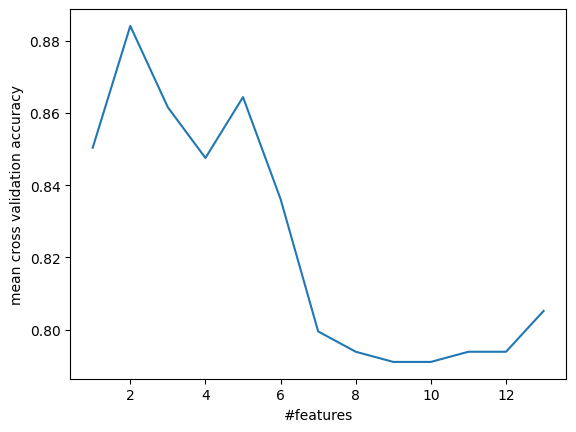

In [ ]:
#Q1
num_feature=len(dataset.feature_names)
mean_cross_val_acc=res[1].copy()
mean_cross_val_acc.reverse()
mean_cross_val_acc.append(full_feature_accuracy)
plt.xlabel("#features")
plt.ylabel("mean cross validation accuracy")
plt.plot(range(1, num_feature+1), mean_cross_val_acc)





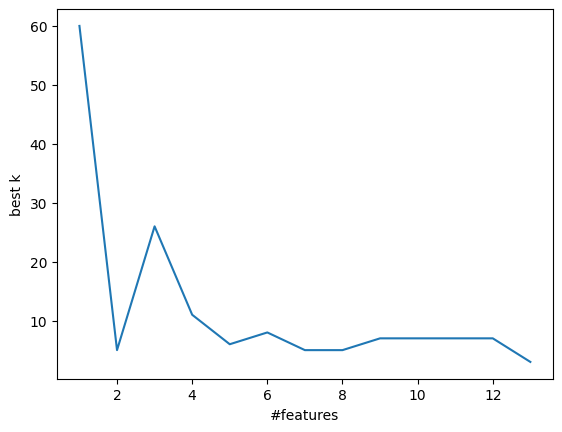

In [ ]:
#Q2
k_vals=res[2].copy()
k_vals.reverse()
k_vals.append(best_k)
plt.xlabel("#features")
plt.ylabel("best k")
plt.plot(range(1, num_feature+1), k_vals)

## Part 4: Standardization [1 Marks]

Standardizing the data usually means scaling our data to have a mean of zero and a standard deviation of one.

**Note:** When we standardize a dataset, do we care if the data points are in our training set or test set? Yes! The training set is available for us to train a model - we can use it however we want. The test set, however, represents a subset of data that is not available for us during training. For example, the test set can represent the data that someone who bought our model would use to see how the model performs (which they are not willing to share with us).
Therefore, we cannot compute the mean or standard deviation of the whole dataset to standardize it - we can only calculate the mean and standard deviation of the training set. However, when we sell a model to someone, we can say what our scalers (mean and standard deviation of our training set) was. They can scale their data (test set) with our training set's mean and standard deviation. Of course, there is no guarantee that the test set would have a mean of zero and a standard deviation of one, but it should work fine.

**To summarize: We fit the StandardScaler only on the training set. We transform both training and test sets with that scaler.**

1. Standardize the training  and test data ([Help](https://scikit-learn.org/stable/modules/preprocessing.html))

2. Call your ``Feature_selector`` function on the standardized training data with a threshold of 95\%.
 * Plot the Cross validation accuracy when we have the standardized data (this part) and the original training data (last part) vs. the Number of features in a single plot (to compare them easily).

3. Discuss how standardization affected your model and its performance?

 **Standardization significantly increases the mean cross validation accuracy.**


the best k is 7
the highest cross-validation accuracy is 0.8729577464788733
0
1
2
3
4
5
6
7
8
9
10
11


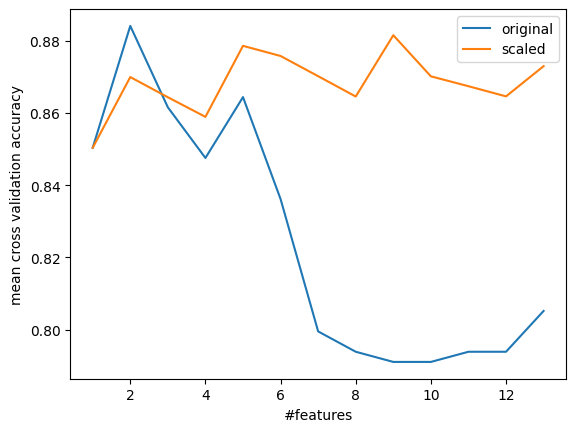

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)

test_scores_scaled=[]

k_values = [i for i in range (1,101)]
for i in k_values:
  KNN=KNeighborsClassifier(n_neighbors=i)
  scores=cross_validate(KNN, X_train_scaled, y_train, cv=5, return_train_score=True)
  test_scores_scaled.append(scores['test_score'].mean())

best_index_scaled = np.argmax(test_scores_scaled)
best_k_scaled = k_values[best_index_scaled]
full_feature_accuracy_scaled=test_scores_scaled[best_index_scaled]
print("the best k is " + str(best_k_scaled))
print("the highest cross-validation accuracy is " + str(full_feature_accuracy_scaled))

res_scaled=Feature_selector(X_train_scaled, y_train)

num_feature=len(dataset.feature_names)

mean_cross_val_acc_scaled=res_scaled[1].copy()
mean_cross_val_acc_scaled.reverse()
mean_cross_val_acc_scaled.append(full_feature_accuracy_scaled)
plt.xlabel("#features")
plt.ylabel("mean cross validation accuracy")
plt.plot(range(1, num_feature+1), mean_cross_val_acc, label='original')
plt.plot(range(1, num_feature+1), mean_cross_val_acc_scaled, label='scaled')
plt.legend()

## Part 5: Decision Tree Classifier [1 Mark]

Train a decision tree classifier on the standardized dataset (read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) and check the example there.) Tune the `max_depth` and `min_samples_split` parameters of the tree using cross-validation (CV).
 * Compare the decision tree's performance (mean CV score) with KNN, both using all the features.


In [ ]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_validate

dt_scores=[]
my_max=0
max_dep=-1
min_samples_splt=-1

for max_depth in range(1, 33):
  for min_samples_split in range(2, 33):

    dt=DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split)
    dt_score=cross_validate(dt, X_train_scaled, y_train, cv=5)
    dt_scores.append(dt_score['test_score'].mean())
    if dt_score['test_score'].mean()>my_max:
      my_max=dt_score['test_score'].mean()
      max_dep=max_depth
      min_samples_splt=min_samples_split


best_index_dt=np.argmax(dt_scores)
highest_dt_score=dt_scores[best_index_dt]


print("the highest cross-validation accuracy for KNN is " + str(full_feature_accuracy_scaled))
print("the highest cross-validation accuracy for Decision Tree Classifier is " + str(highest_dt_score))

the highest cross-validation accuracy for KNN is 0.8729577464788733
the highest cross-validation accuracy for Decision Tree Classifier is 0.8756539235412475


## Part 6: Test Data [0.5 Mark]

Now that you've created several models, pick your best one (highest CV accuracy) and apply it to the test dataset you had initially set aside. Discuss your results.

**The best model is the KNN model with two features ('RM' and 'LSTAT') with k=5 as it has the highest cv score. We apply this model to the test dataset and the accuracy is about 82.3%. The accuracy is a bit lower than applying to the training set so there maybe exist overfitting issue in this model.**

In [ ]:
from sklearn.metrics import accuracy_score
X_test_scaled=scaler.transform(X_test)

removed_features=res[0].copy()
removed_features.pop()

mean_cva=res[1].copy()
mean_cva.pop()

best_k_lst=res[2].copy()
best_k_lst.pop()

df_final=pds.DataFrame(data=X_test_scaled, columns=dataset.feature_names)
df_final.drop(removed_features, axis=1, inplace=True)
#print(df_final)
#print(df_final)
mcva=mean_cva[-1]
bk=best_k_lst[-1]
#print(mcva)
#print(bk)
KNN_final=KNeighborsClassifier(n_neighbors=5)

final_score=cross_validate(KNN, df_final, y_test, cv=5)

print("the accuracy is " + str(final_score['test_score'].mean()))







the accuracy is 0.823010752688172


References:

https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052

https://www.analyticsvidhya.com/blog/2021/02/machine-learning-101-decision-tree-algorithm-for-classification/